In [112]:
! pip freeze

absl-py==1.2.0
ale-py==0.7.4
alembic==1.8.1
asttokens==2.0.8
astunparse==1.6.3
attrs==22.1.0
autopage==0.5.1
AutoROM==0.4.2
AutoROM.accept-rom-license==0.4.2
backcall==0.2.0
beautifulsoup4==4.12.3
cachetools==5.2.0
catboost==1.2.5
certifi==2022.9.24
charset-normalizer==2.1.1
click==8.1.3
cliff==4.0.0
cloudpickle==2.2.0
cmaes==0.8.2
cmake==3.24.1.1
cmd2==2.4.2
colorama==0.4.5
colorlog==6.7.0
commonmark==0.9.1
contourpy==1.0.5
cycler==0.11.0
deap==1.3.3
debugpy==1.6.3
decorator==5.1.1
dill==0.3.6
entrypoints==0.4
et-xmlfile==1.1.0
etils==0.9.0
executing==1.1.0
filelock==3.8.0
flatbuffers==2.0.7
fonttools==4.37.3
gast==0.4.0
glfw==2.5.5
google-auth==2.11.1
google-auth-oauthlib==0.4.6
google-pasta==0.2.0
googleapis-common-protos==1.57.0
graphviz==0.20.3
greenlet==1.1.3.post0
grpcio==1.49.1
gym==0.21.0
gym-notices==0.0.8
Gymnasium==0.26.3
gymnasium-notices==0.0.1
h5py==3.7.0
huggingface-hub==0.10.1
huggingface-sb3==2.2.4
idna==3.4
imbalanced-learn==0.12.2
imblearn==0.0
import-from-github-co

In [74]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime
import re

In [75]:
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, recall_score, roc_auc_score
from scipy.stats import ks_2samp

In [76]:
import warnings

# Importation de la base de données

In [77]:
df = pd.read_excel("/Users/Bounadja Bilal/Documents/projet_mehdi/dataset.xlsx")
df.head()

,Patient ID,Patient age quantile,SARS-Cov-2 exam result,"Patient addmited to regular ward (1=yes, 0=no)","Patient addmited to semi-intensive unit (1=yes, 0=no)","Patient addmited to intensive care unit (1=yes, 0=no)",Hematocrit,Hemoglobin,Platelets,Mean platelet volume,Red blood Cells,Lymphocytes,Mean corpuscular hemoglobin concentration (MCHC),Leukocytes,Basophils,Mean corpuscular hemoglobin (MCH),Eosinophils,Mean corpuscular volume (MCV),Monocytes,Red blood cell distribution width (RDW),Serum Glucose,Respiratory Syncytial Virus,Influenza A,Influenza B,Parainfluenza 1,CoronavirusNL63,Rhinovirus/Enterovirus,Mycoplasma pneumoniae,Coronavirus HKU1,Parainfluenza 3,Chlamydophila pneumoniae,Adenovirus,Parainfluenza 4,Coronavirus229E,CoronavirusOC43,Inf A H1N1 2009,Bordetella pertussis,Metapneumovirus,Parainfluenza 2,Neutrophils,Urea,Proteina C reativa mg/dL,Creatinine,Potassium,Sodium,"Influenza B, rapid test","Influenza A, rapid test",Alanine transaminase,Aspartate transaminase,Gamma-glutamyltransferase,Total Bilirubin,Direct Bilirubin,Indirect Bilirubin,Alkaline phosphatase,Ionized calcium,Strepto A,Magnesium,pCO2 (venous blood gas analysis),Hb saturation (venous blood gas analysis),Base excess (venous blood gas analysis),pO2 (venous blood gas analysis),Fio2 (venous blood gas analysis),Total CO2 (venous blood gas analysis),pH (venous blood gas analysis),HCO3 (venous blood gas analysis),Rods #,Segmented,Promyelocytes,Metamyelocytes,Myelocytes,Myeloblasts,Urine - Esterase,Urine - Aspect,Urine - pH,Urine - Hemoglobin,Urine - Bile pigments,Urine - Ketone Bodies,Urine - Nitrite,Urine - Density,Urine - Urobilinogen,Urine - Protein,Urine - Sugar,Urine - Leukocytes,Urine - Crystals,Urine - Red blood cells,Urine - Hyaline cylinders,Urine - Granular cylinders,Urine - Yeasts,Urine - Color,Partial thromboplastin time (PTT),Relationship (Patient/Normal),International normalized ratio (INR),Lactic Dehydrogenase,"Prothrombin time (PT), Activity",Vitamin B12,Creatine phosphokinase (CPK),Ferritin,Arterial Lactic Acid,Lipase dosage,D-Dimer,Albumin,Hb saturation (arterial blood gases),pCO2 (arterial blood gas analysis),Base excess (arterial blood gas analysis),pH (arterial blood gas analysis),Total CO2 (arterial blood gas analysis),HCO3 (arterial blood gas analysis),pO2 (arterial blood gas analysis),Arteiral Fio2,Phosphor,ctO2 (arterial blood gas analysis)
0,44477f75e8169d2,13,negative,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,126e9dd13932f68,17,negative,0,0,0,0.236515,-0.02234,-0.517413,0.010677,0.102004,0.318366,-0.95079,-0.09461,-0.223767,-0.292269,1.482158,0.166192,0.357547,-0.625073,-0.140648,not_detected,not_detected,not_detected,not_detected,not_detected,detected,NaN,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,-0.619086,1.198059,-0.147895,2.089928,-0.305787,0.862512,negative,negative,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,a46b4402a0e5696,8,negative,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [78]:
df.shape

(5644, 111)

# Affichage des valeurs absentes

In [79]:
df.isna().sum()

Patient ID                                                  0
Patient age quantile                                        0
SARS-Cov-2 exam result                                      0
Patient addmited to regular ward (1=yes, 0=no)              0
Patient addmited to semi-intensive unit (1=yes, 0=no)       0
Patient addmited to intensive care unit (1=yes, 0=no)       0
Hematocrit                                               5041
Hemoglobin                                               5041
Platelets                                                5042
Mean platelet volume                                     5045
Red blood Cells                                          5042
Lymphocytes                                              5042
Mean corpuscular hemoglobin concentration (MCHC)         5042
Leukocytes                                               5042
Basophils                                                5042
Mean corpuscular hemoglobin (MCH)                        5042
Eosinoph

In [80]:
pd.set_option('display.max_columns', 500)

In [81]:
df.columns.tolist()

['Patient ID',
 'Patient age quantile',
 'SARS-Cov-2 exam result',
 'Patient addmited to regular ward (1=yes, 0=no)',
 'Patient addmited to semi-intensive unit (1=yes, 0=no)',
 'Patient addmited to intensive care unit (1=yes, 0=no)',
 'Hematocrit',
 'Hemoglobin',
 'Platelets',
 'Mean platelet volume ',
 'Red blood Cells',
 'Lymphocytes',
 'Mean corpuscular hemoglobin concentration\xa0(MCHC)',
 'Leukocytes',
 'Basophils',
 'Mean corpuscular hemoglobin (MCH)',
 'Eosinophils',
 'Mean corpuscular volume (MCV)',
 'Monocytes',
 'Red blood cell distribution width (RDW)',
 'Serum Glucose',
 'Respiratory Syncytial Virus',
 'Influenza A',
 'Influenza B',
 'Parainfluenza 1',
 'CoronavirusNL63',
 'Rhinovirus/Enterovirus',
 'Mycoplasma pneumoniae',
 'Coronavirus HKU1',
 'Parainfluenza 3',
 'Chlamydophila pneumoniae',
 'Adenovirus',
 'Parainfluenza 4',
 'Coronavirus229E',
 'CoronavirusOC43',
 'Inf A H1N1 2009',
 'Bordetella pertussis',
 'Metapneumovirus',
 'Parainfluenza 2',
 'Neutrophils',
 'Urea',

## Description des différentes colonnes

Il serait long de décrire une par une les colonnes masi globalement on observe différents type de données dans un premier temps des données relative à l'identification du patient et sa positivité au sras cov2 avec une indication sur la gravité de cette infection,des données sanguines ou relatives aux urines et a l'hepatologie, enfin on a des données qui indique la présence de certains anticorps chez le patient

In [82]:
df

,Patient ID,Patient age quantile,SARS-Cov-2 exam result,"Patient addmited to regular ward (1=yes, 0=no)","Patient addmited to semi-intensive unit (1=yes, 0=no)","Patient addmited to intensive care unit (1=yes, 0=no)",Hematocrit,Hemoglobin,Platelets,Mean platelet volume,Red blood Cells,Lymphocytes,Mean corpuscular hemoglobin concentration (MCHC),Leukocytes,Basophils,Mean corpuscular hemoglobin (MCH),Eosinophils,Mean corpuscular volume (MCV),Monocytes,Red blood cell distribution width (RDW),Serum Glucose,Respiratory Syncytial Virus,Influenza A,Influenza B,Parainfluenza 1,CoronavirusNL63,Rhinovirus/Enterovirus,Mycoplasma pneumoniae,Coronavirus HKU1,Parainfluenza 3,Chlamydophila pneumoniae,Adenovirus,Parainfluenza 4,Coronavirus229E,CoronavirusOC43,Inf A H1N1 2009,Bordetella pertussis,Metapneumovirus,Parainfluenza 2,Neutrophils,Urea,Proteina C reativa mg/dL,Creatinine,Potassium,Sodium,"Influenza B, rapid test","Influenza A, rapid test",Alanine transaminase,Aspartate transaminase,Gamma-glutamyltransferase,Total Bilirubin,Direct Bilirubin,Indirect Bilirubin,Alkaline phosphatase,Ionized calcium,Strepto A,Magnesium,pCO2 (venous blood gas analysis),Hb saturation (venous blood gas analysis),Base excess (venous blood gas analysis),pO2 (venous blood gas analysis),Fio2 (venous blood gas analysis),Total CO2 (venous blood gas analysis),pH (venous blood gas analysis),HCO3 (venous blood gas analysis),Rods #,Segmented,Promyelocytes,Metamyelocytes,Myelocytes,Myeloblasts,Urine - Esterase,Urine - Aspect,Urine - pH,Urine - Hemoglobin,Urine - Bile pigments,Urine - Ketone Bodies,Urine - Nitrite,Urine - Density,Urine - Urobilinogen,Urine - Protein,Urine - Sugar,Urine - Leukocytes,Urine - Crystals,Urine - Red blood cells,Urine - Hyaline cylinders,Urine - Granular cylinders,Urine - Yeasts,Urine - Color,Partial thromboplastin time (PTT),Relationship (Patient/Normal),International normalized ratio (INR),Lactic Dehydrogenase,"Prothrombin time (PT), Activity",Vitamin B12,Creatine phosphokinase (CPK),Ferritin,Arterial Lactic Acid,Lipase dosage,D-Dimer,Albumin,Hb saturation (arterial blood gases),pCO2 (arterial blood gas analysis),Base excess (arterial blood gas analysis),pH (arterial blood gas analysis),Total CO2 (arterial blood gas analysis),HCO3 (arterial blood gas analysis),pO2 (arterial blood gas analysis),Arteiral Fio2,Phosphor,ctO2 (arterial blood gas analysis)
0,44477f75e8169d2,13,negative,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,126e9dd13932f68,17,negative,0,0,0,0.236515,-0.022340,-0.517413,0.010677,0.102004,0.318366,-0.950790,-0.094610,-0.223767,-0.292269,1.482158,0.166192,0.357547,-0.625073,-0.140648,not_detected,not_detected,not_detected,not_detected,not_detected,detected,NaN,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,-0.619086,1.198059,-0.147895,2.089928,-0.305787,0.862512,negative,negative,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,a46b4402a0e5696,8,negative,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

Identification de la variable cible

In [83]:
target=['SARS-Cov-2 exam result']

On commence par tranformer certaines données sous forme numérique

In [84]:
# Transform to numeric
df['SARS-Cov-2 exam result'] = df['SARS-Cov-2 exam result'].map({'positive': 1, 'negative': 0})

# Map detected/not_detected and positive/negative to 1 and 0
df = df.replace({'positive': 1, 'negative': 0, 'detected': 1, 'not_detected': 0})

df['SARS-Cov-2 exam result'].value_counts(normalize=True)

0    0.901134
1    0.098866
Name: SARS-Cov-2 exam result, dtype: float64

# Nan Clearing

On remarque qu'il y a énormément de valeurs nulles sur la plupart des colonnes, il faut donc établir une stratégie pour ne conserver que les données exploitables

In [85]:
df[df.columns[df.isna().any()]]

,Hematocrit,Hemoglobin,Platelets,Mean platelet volume,Red blood Cells,Lymphocytes,Mean corpuscular hemoglobin concentration (MCHC),Leukocytes,Basophils,Mean corpuscular hemoglobin (MCH),Eosinophils,Mean corpuscular volume (MCV),Monocytes,Red blood cell distribution width (RDW),Serum Glucose,Respiratory Syncytial Virus,Influenza A,Influenza B,Parainfluenza 1,CoronavirusNL63,Rhinovirus/Enterovirus,Mycoplasma pneumoniae,Coronavirus HKU1,Parainfluenza 3,Chlamydophila pneumoniae,Adenovirus,Parainfluenza 4,Coronavirus229E,CoronavirusOC43,Inf A H1N1 2009,Bordetella pertussis,Metapneumovirus,Parainfluenza 2,Neutrophils,Urea,Proteina C reativa mg/dL,Creatinine,Potassium,Sodium,"Influenza B, rapid test","Influenza A, rapid test",Alanine transaminase,Aspartate transaminase,Gamma-glutamyltransferase,Total Bilirubin,Direct Bilirubin,Indirect Bilirubin,Alkaline phosphatase,Ionized calcium,Strepto A,Magnesium,pCO2 (venous blood gas analysis),Hb saturation (venous blood gas analysis),Base excess (venous blood gas analysis),pO2 (venous blood gas analysis),Fio2 (venous blood gas analysis),Total CO2 (venous blood gas analysis),pH (venous blood gas analysis),HCO3 (venous blood gas analysis),Rods #,Segmented,Promyelocytes,Metamyelocytes,Myelocytes,Myeloblasts,Urine - Esterase,Urine - Aspect,Urine - pH,Urine - Hemoglobin,Urine - Bile pigments,Urine - Ketone Bodies,Urine - Nitrite,Urine - Density,Urine - Urobilinogen,Urine - Protein,Urine - Sugar,Urine - Leukocytes,Urine - Crystals,Urine - Red blood cells,Urine - Hyaline cylinders,Urine - Granular cylinders,Urine - Yeasts,Urine - Color,Partial thromboplastin time (PTT),Relationship (Patient/Normal),International normalized ratio (INR),Lactic Dehydrogenase,"Prothrombin time (PT), Activity",Vitamin B12,Creatine phosphokinase (CPK),Ferritin,Arterial Lactic Acid,Lipase dosage,D-Dimer,Albumin,Hb saturation (arterial blood gases),pCO2 (arterial blood gas analysis),Base excess (arterial blood gas analysis),pH (arterial blood gas analysis),Total CO2 (arterial blood gas analysis),HCO3 (arterial blood gas analysis),pO2 (arterial blood gas analysis),Arteiral Fio2,Phosphor,ctO2 (arterial blood gas analysis)
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.236515,-0.022340,-0.517413,0.010677,0.102004,0.318366,-0.950790,-0.094610,-0.223767,-0.292269,1.482158,0.166192,0.357547,-0.625073,-0.140648,0.0,0.0,0.0,0.0,0.0,1.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.619086,1.198059,-0.147895,2.089928,-0.305787,0.862512,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

On affiche le pourcentage de valeur nulle par colonne

In [86]:
df_null_pct = df.isna().mean().round(4) * 100

df_null_pct.sort_values(ascending=False)

Urine - Sugar                                            100.00
Mycoplasma pneumoniae                                    100.00
Partial thromboplastin time (PTT)                        100.00
Prothrombin time (PT), Activity                          100.00
D-Dimer                                                  100.00
Fio2 (venous blood gas analysis)                          99.98
Urine - Nitrite                                           99.98
Vitamin B12                                               99.95
Lipase dosage                                             99.86
Albumin                                                   99.77
Phosphor                                                  99.65
Arteiral Fio2                                             99.65
Ferritin                                                  99.59
Arterial Lactic Acid                                      99.52
ctO2 (arterial blood gas analysis)                        99.52
Hb saturation (arterial blood gases)    

Certaine colonne n'ont que des valeurs nulles il va donc falloir les supprimées, mais d'abord faisant un état de la distribution de ces valeurs nulles

<AxesSubplot: ylabel='Frequency'>

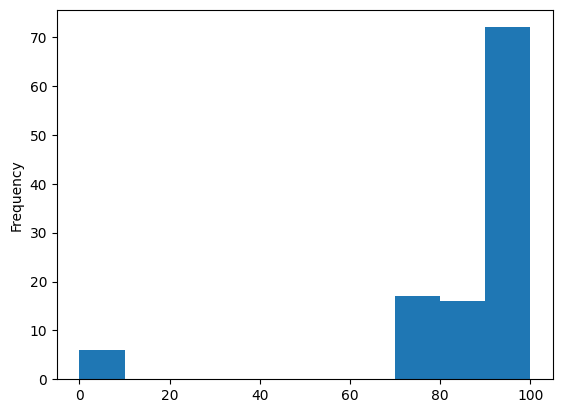

In [87]:
df_null_pct.plot(kind='hist')

La plupart des features du dataset ont plus de 70% de valeurs nulles, on également une majorité des features nulles à plus de 90%, il va donc falloir faire des choix, une des solutions pourrait être de moyenner certaines valeurs par rapport au valeur non nulles mais ici il y a énormément de données manquantes on va donc faire le choix de supprimer les features contennant plus de 90% de NaN

In [88]:
nulls = df_null_pct[df_null_pct > 90]

df = df[[col for col in df.columns if col not in nulls]]

df.head()

,Patient ID,Patient age quantile,SARS-Cov-2 exam result,"Patient addmited to regular ward (1=yes, 0=no)","Patient addmited to semi-intensive unit (1=yes, 0=no)","Patient addmited to intensive care unit (1=yes, 0=no)",Hematocrit,Hemoglobin,Platelets,Mean platelet volume,Red blood Cells,Lymphocytes,Mean corpuscular hemoglobin concentration (MCHC),Leukocytes,Basophils,Mean corpuscular hemoglobin (MCH),Eosinophils,Mean corpuscular volume (MCV),Monocytes,Red blood cell distribution width (RDW),Respiratory Syncytial Virus,Influenza A,Influenza B,Parainfluenza 1,CoronavirusNL63,Rhinovirus/Enterovirus,Coronavirus HKU1,Parainfluenza 3,Chlamydophila pneumoniae,Adenovirus,Parainfluenza 4,Coronavirus229E,CoronavirusOC43,Inf A H1N1 2009,Bordetella pertussis,Metapneumovirus,Parainfluenza 2,"Influenza B, rapid test","Influenza A, rapid test"
0,44477f75e8169d2,13,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,126e9dd13932f68,17,0,0,0,0,0.236515,-0.02234,-0.517413,0.010677,0.102004,0.318366,-0.95079,-0.09461,-0.223767,-0.292269,1.482158,0.166192,0.357547,-0.625073,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,a46b4402a0e5696,8,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,f7d619a94f97c45,5,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,d9e41465789c2b5,15,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN


In [89]:
df.shape

(5644, 39)

Il nous reste uniquement 39 features sur les 111 de départ mais des ajustements sont encore nécessaire

In [90]:
features = [col for col in df.columns if col not in ['Patient ID', 
                                                    'Patient addmited to regular ward (1=yes, 0=no)',
                                                    'Patient addmited to semi-intensive unit (1=yes, 0=no)',
                                                    'Patient addmited to intensive care unit (1=yes, 0=no)',
                                                    'SARS-Cov-2 exam result']]
pd.set_option('display.max_rows', 1000)
print(df[features].var())

Patient age quantile                                33.384166
Hematocrit                                           1.001661
Hemoglobin                                           1.001661
Platelets                                            1.001664
Mean platelet volume                                 1.001672
Red blood Cells                                      1.001664
Lymphocytes                                          1.001664
Mean corpuscular hemoglobin concentration (MCHC)     1.001664
Leukocytes                                           1.001664
Basophils                                            1.001664
Mean corpuscular hemoglobin (MCH)                    1.001664
Eosinophils                                          1.001664
Mean corpuscular volume (MCV)                        1.001664
Monocytes                                            1.001667
Red blood cell distribution width (RDW)              1.001664
Respiratory Syncytial Virus                          0.036957
Influenz

Parainfluenza 2 feature got a 0 variance so we can delete it 

In [91]:
df.drop('Parainfluenza 2', axis=1, inplace=True)
features.remove('Parainfluenza 2')

19 Colonnes dans le dataframe sont relatif a des anticorps présent ou non chez le patient, ils indiquent l'infection ou non à une maladie,ces variables sont binaires. Lorsque nous les analysons un par un, le nombre de valeurs nulles est très élevé. Mais si l’on augmente la somme, le pourcentage nul diminue. Cette variable indique, pour chaque patient, si au moins une de ces variables est positive.

Je fais l'hypothèse de remplir les valeurs nulles restantes : si toutes ces colonnes sont nulles, je suppose que le patient n'a aucune de ces maladies (has_disease = 0). Il peut y avoir des cas où cela est faux et où la personne n'a tout simplement pas été testée, mais cela peut être une bonne approximation.


In [92]:
df['has_disease'] = df[df.columns[20:]].sum(axis=1)

df.loc[df['has_disease'] > 1, 'has_disease'] = 1

df['has_disease'].value_counts(normalize=True)

0.0    0.865344
1.0    0.134656
Name: has_disease, dtype: float64

13% des patients ont contracté une maladie

In [93]:
df[df['has_disease'] == 1]['SARS-Cov-2 exam result'].value_counts(normalize=True)

0    0.981579
1    0.018421
Name: SARS-Cov-2 exam result, dtype: float64

Mais seulement 2% des patients malades ont contracté le COVID 19 contre 10% dans l'ensemble de la base de donnée

In [94]:
df_clean=df.copy()

In [95]:
print('Total Columns: ', df_clean.shape[1])
df_clean.isna().sum(axis=1).value_counts()

Total Columns:  39


32    3596
16     917
30     458
2      263
14     166
18     139
0       99
3        4
29       1
27       1
dtype: int64

Il y a 3596 lignes sur 5644 qui ont 32 colonnes avec des NaN sur 39

In [96]:
df_red = df_clean[df_clean.isna().sum(axis=1) < 26]

df_red.head()

,Patient ID,Patient age quantile,SARS-Cov-2 exam result,"Patient addmited to regular ward (1=yes, 0=no)","Patient addmited to semi-intensive unit (1=yes, 0=no)","Patient addmited to intensive care unit (1=yes, 0=no)",Hematocrit,Hemoglobin,Platelets,Mean platelet volume,Red blood Cells,Lymphocytes,Mean corpuscular hemoglobin concentration (MCHC),Leukocytes,Basophils,Mean corpuscular hemoglobin (MCH),Eosinophils,Mean corpuscular volume (MCV),Monocytes,Red blood cell distribution width (RDW),Respiratory Syncytial Virus,Influenza A,Influenza B,Parainfluenza 1,CoronavirusNL63,Rhinovirus/Enterovirus,Coronavirus HKU1,Parainfluenza 3,Chlamydophila pneumoniae,Adenovirus,Parainfluenza 4,Coronavirus229E,CoronavirusOC43,Inf A H1N1 2009,Bordetella pertussis,Metapneumovirus,"Influenza B, rapid test","Influenza A, rapid test",has_disease
1,126e9dd13932f68,17,0,0,0,0,0.236515,-0.022340,-0.517413,0.010677,0.102004,0.318366,-0.950790,-0.09461,-0.223767,-0.292269,1.482158,0.166192,0.357547,-0.625073,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,d9e41465789c2b5,15,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,1.0
8,8bb9d64f0215244,1,0,0,1,0,-1.571682,-0.774212,1.429667,-1.672222,-0.850035,-0.005738,3.331071,0.36455,-0.223767,0.178175,1.018625,-1.336024,0.068652,-0.978899,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0
9,5f1ed301375586c,17,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0
13,0fbafd910aa8078,13,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0


On prends les lignes avec moins de 26 colonnes nulles (les lignes contenant 27 ou 29 colonnes nulles étant unique et en prenant compte du fort nombre de lignes avec 30 ou 32 colonnes nulles)

In [97]:
df_red.shape

(1588, 39)

In [98]:
df_null_pct = df_red.isna().mean().round(4) * 100

df_null_pct.sort_values(ascending=False)

Influenza A, rapid test                                  77.20
Influenza B, rapid test                                  77.20
Mean platelet volume                                     62.28
Monocytes                                                62.15
Red blood cell distribution width (RDW)                  62.09
Lymphocytes                                              62.09
Mean corpuscular volume (MCV)                            62.09
Mean corpuscular hemoglobin (MCH)                        62.09
Basophils                                                62.09
Leukocytes                                               62.09
Mean corpuscular hemoglobin concentration (MCHC)         62.09
Eosinophils                                              62.09
Red blood Cells                                          62.09
Hemoglobin                                               62.09
Hematocrit                                               62.09
Platelets                                              

Nous pouvons voir que les variables sanguines ont un nombre égal de valeurs nulles. Pour ma modélisation, je ne considérerai que les lignes contenant des données complètes sur les variables sanguines. Nous espérons que l'effet des autres colonnes sera concentré sur la variable "has_disease". De cette façon, nous pouvons conserver les deux « types » de variables dans la modélisation.


In [99]:
df_red = df_red[df_red['Leukocytes'].notna()]

df_null_pct = df_red.isna().mean().round(4) * 100

df_null_pct.sort_values(ascending=False)

Influenza A, rapid test                                  67.44
Influenza B, rapid test                                  67.44
Parainfluenza 4                                          39.20
Adenovirus                                               39.20
Influenza B                                              39.20
Parainfluenza 1                                          39.20
CoronavirusNL63                                          39.20
Rhinovirus/Enterovirus                                   39.20
Coronavirus HKU1                                         39.20
Parainfluenza 3                                          39.20
Chlamydophila pneumoniae                                 39.20
Respiratory Syncytial Virus                              39.20
Influenza A                                              39.20
Coronavirus229E                                          39.20
CoronavirusOC43                                          39.20
Inf A H1N1 2009                                        

On remplace par la moyenne les valeurs encore nulles

In [100]:
df_red.loc[df_red['Mean platelet volume '].isna(), 'Mean platelet volume '] = df_red['Mean platelet volume '].mean()

df_red.loc[df_red['Monocytes'].isna(), 'Monocytes'] = df_red['Monocytes'].mean()

On ne garde que les variables relatives au bilan sanguin et l'indication qui montre si le patient est infecté ou non 'has_disease'

In [101]:
cols_to_remove = [c for c in df_red.columns[20:-1]]
df_feat = df_red.drop(cols_to_remove, axis=1)

#update features
features = [c for c in df_feat.columns if c not in ['Patient ID', 'SARS-Cov-2 exam result',
                                                   'Patient addmited to regular ward (1=yes, 0=no)',
                                                   'Patient addmited to semi-intensive unit (1=yes, 0=no)',
                                                   'Patient addmited to intensive care unit (1=yes, 0=no)']]

df_feat.head()

,Patient ID,Patient age quantile,SARS-Cov-2 exam result,"Patient addmited to regular ward (1=yes, 0=no)","Patient addmited to semi-intensive unit (1=yes, 0=no)","Patient addmited to intensive care unit (1=yes, 0=no)",Hematocrit,Hemoglobin,Platelets,Mean platelet volume,Red blood Cells,Lymphocytes,Mean corpuscular hemoglobin concentration (MCHC),Leukocytes,Basophils,Mean corpuscular hemoglobin (MCH),Eosinophils,Mean corpuscular volume (MCV),Monocytes,Red blood cell distribution width (RDW),has_disease
1,126e9dd13932f68,17,0,0,0,0,0.236515,-0.022340,-0.517413,0.010677,0.102004,0.318366,-0.950790,-0.094610,-0.223767,-0.292269,1.482158,0.166192,0.357547,-0.625073,1.0
8,8bb9d64f0215244,1,0,0,1,0,-1.571682,-0.774212,1.429667,-1.672222,-0.850035,-0.005738,3.331071,0.364550,-0.223767,0.178175,1.018625,-1.336024,0.068652,-0.978899,0.0
15,6c9d3323975b082,9,0,0,0,0,-0.747693,-0.586244,-0.429480,-0.213711,-1.361315,-1.114514,0.542882,-0.884923,0.081693,1.746323,-0.666950,1.668409,1.276759,-1.067355,1.0
18,d3ea751f3db9de9,11,0,0,0,0,0.991838,0.792188,0.072992,-0.550290,0.542763,0.045436,-0.452899,-0.211488,-0.834685,0.334989,-0.709090,0.606842,-0.220244,0.171035,1.0
22,2c2eae16c12a18a,9,0,0,0,0,0.190738,-0.147652,-0.668155,1.020415,-0.127191,0.002791,-1.249524,-1.132592,0.387152,-0.083183,-0.709090,0.566783,2.012129,0.613318,0.0


In [102]:
df.shape


(5644, 39)

In [103]:
df_red.shape

(602, 39)

In [104]:
df_feat.shape

(602, 21)

On est passé d'un dataframe de 5644 lignes pour 39 colonnes a un dataframe de 602 lignes pour 21 colonnes, en espérant que le lot de données resultant suffiras a avoir des performances satisafaisante sinon il faudra changer la façon dont on traite les données nulles

In [105]:
df_feat.isna().sum().sum()

0

Plus aucune valeurs nulles

Maintenant nous allons jeter un oeil aux corrélations des variables entre elles, l'étude des corrélation permet d'avoir un appriori des variables les plus importante pour la variable cible. 


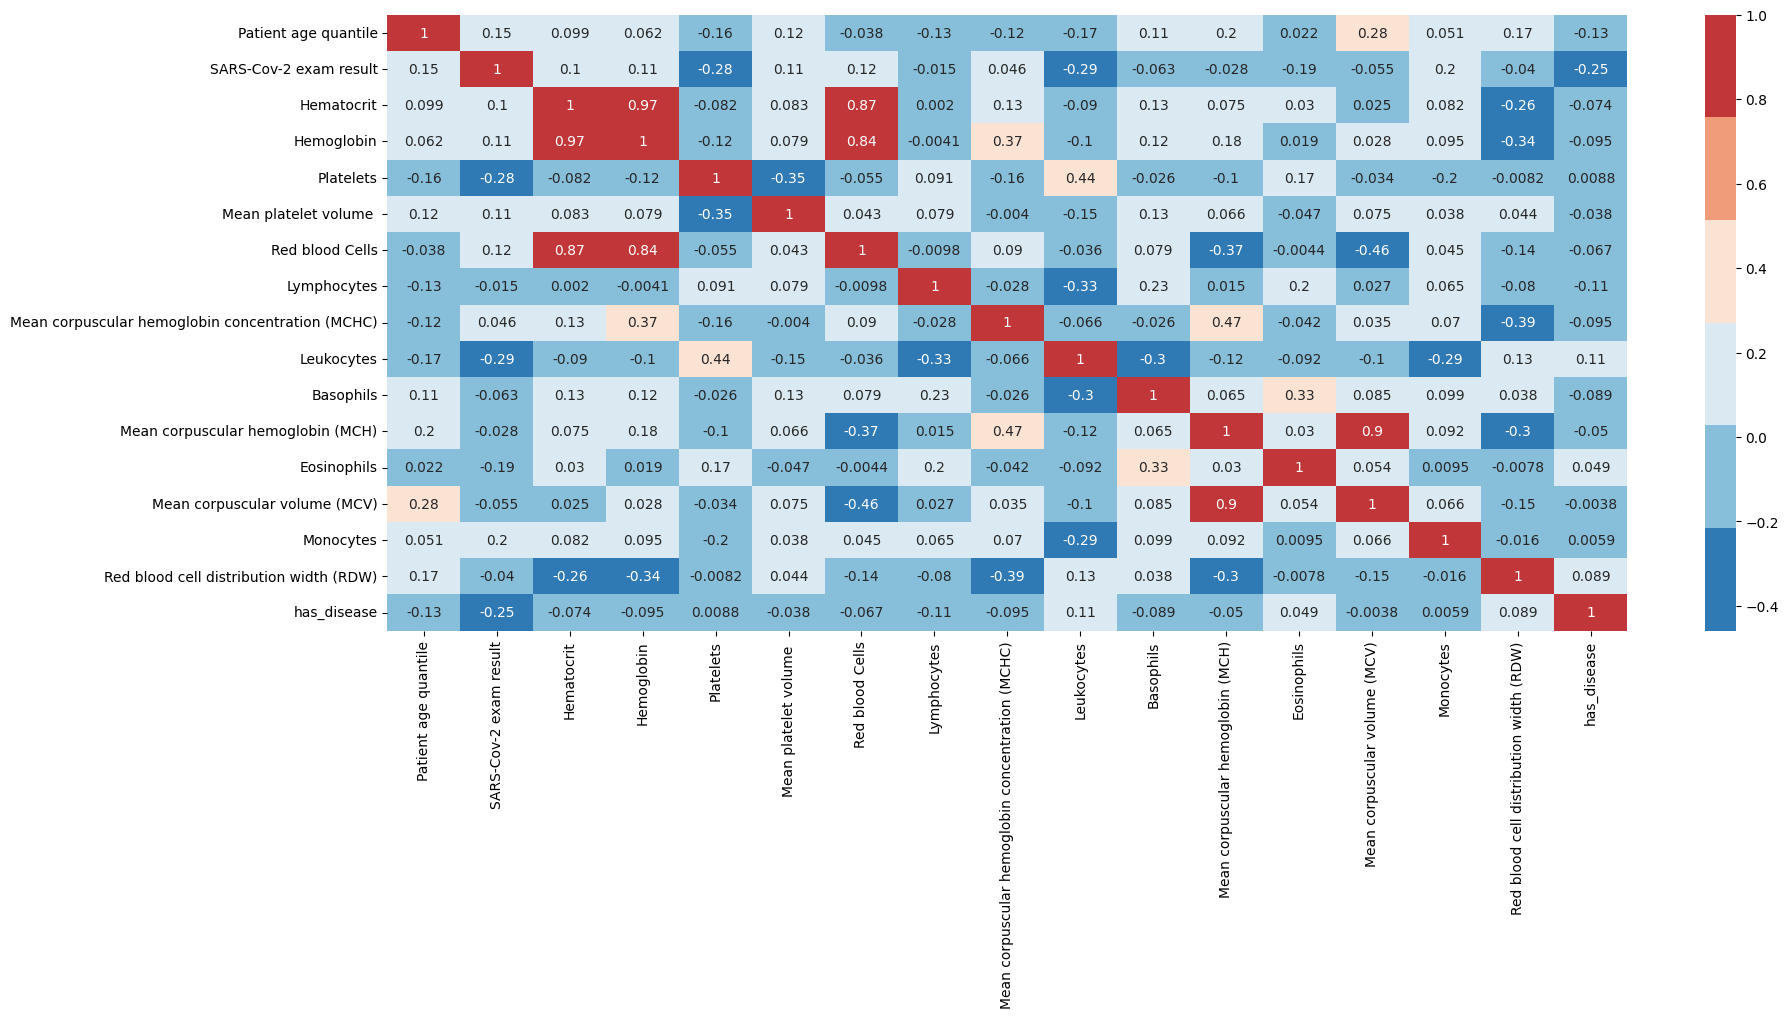

In [106]:
corr = df_feat.drop(['Patient ID', 'Patient addmited to regular ward (1=yes, 0=no)', 
             'Patient addmited to semi-intensive unit (1=yes, 0=no)',
             'Patient addmited to intensive care unit (1=yes, 0=no)'], axis=1).corr()

plt.figure(figsize=(20,8))
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, cmap=sns.color_palette('RdBu_r'), 
            annot=True)

plt.show()

Ici les leucocytes, les plaquettes et has_disease ont une corrélation proche de -0,3 - ce seront des variables importantes. En revanche, les monocytes et l’âge ont une légère corrélation positive.

Certaines caractéristiques ont une forte corrélation en elles-mêmes, nous devons donc prendre des décisions afin de réduire le bruit. Hématocrite et Hémoglobine signifient fondamentalement la même chose (corrélation de 0,97). Ils ont également une très forte corrélation avec les globules rouges (0,87 et 0,84, respectivement). Leurs corrélations avec la cible sont également très similaires, je garderai donc celle avec la plus élevée (globules rouges, 0,12). Les deux autres variables fortement corrélées sont MCV et MCH – dans ce cas, MCV est plus corrélé à la cible (-0,055 contre -0,028), je le garderai donc.

In [107]:
df_feat = df_feat.drop(['Mean corpuscular hemoglobin (MCH)', 'Hematocrit', 'Hemoglobin'], axis=1)
#update features
features = [f for f in features if f not in ['Mean corpuscular hemoglobin (MCH)', 'Hematocrit', 'Hemoglobin']]

In [109]:
df_feat

,Patient ID,Patient age quantile,SARS-Cov-2 exam result,"Patient addmited to regular ward (1=yes, 0=no)","Patient addmited to semi-intensive unit (1=yes, 0=no)","Patient addmited to intensive care unit (1=yes, 0=no)",Platelets,Mean platelet volume,Red blood Cells,Lymphocytes,Mean corpuscular hemoglobin concentration (MCHC),Leukocytes,Basophils,Eosinophils,Mean corpuscular volume (MCV),Monocytes,Red blood cell distribution width (RDW),has_disease
1,126e9dd13932f68,17,0,0,0,0,-0.517413,1.067657e-02,0.102004,0.318366,-0.950790,-0.094610,-0.223767,1.482158,0.166192,3.575467e-01,-0.625073,1.0
8,8bb9d64f0215244,1,0,0,1,0,1.429667,-1.672222e+00,-0.850035,-0.005738,3.331071,0.364550,-0.223767,1.018625,-1.336024,6.865151e-02,-0.978899,0.0
15,6c9d3323975b082,9,0,0,0,0,-0.429480,-2.137107e-01,-1.361315,-1.114514,0.542882,-0.884923,0.081693,-0.666950,1.668409,1.276759e+00,-1.067355,1.0
18,d3ea751f3db9de9,11,0,0,0,0,0.072992,-5.502895e-01,0.542763,0.045436,-0.452899,-0.211488,-0.834685,-0.709090,0.606842,-2.202439e-01,0.171035,1.0
22,2c2eae16c12a18a,9,0,0,0,0,-0.668155,1.020415e+00,-0.127191,0.002791,-1.249524,-1.132592,0.387152,-0.709090,0.566783,2.012129e+00,0.613318,0.0
28,fc41531ca4faf1e,13,0,0,0,0,-0.178244,7.960289e-01,0.489872,-0.730707,-0.353319,-0.075131,2.525365,0.217977,0.767079,6.865151e-02,0.171035,1.0
29,891d0f6449ff3d7,14,0,0,0,0,0.361914,-5.502895e-01,0.436981,-0.227493,0.642463,0.105751,-0.529226,-0.371974,0.386517,1.211779e-01,-0.713529,0.0
30,ebdd7c67fcb21b4,9,0,1,0,0,0.952319,-8.868694e-01,-0.321124,-0.875701,-0.253742,-0.286623,-0.223767,-0.540532,-0.675050,8.040212e-01,-0.890442,1.0
32,296adf066a9bf03,8,0,0,0,0,0.072992,5.716427e-01,0.066744,1.239503,-0.652057,-0.545423,0.998070,0.133698,0.246311,-4.828759e-01,-0.094334,0.0
34,0b1e43c5e3fb1d1,17,0,0,0,0,-0.278739,1.581381e+00,0.701437,-0.261609,1.040773,0.000005,0.387152,0.049419,-0.014074,-5.091391e-01,-0.094334,1.0


In [111]:
df_feat.shape

(602, 18)

In [110]:
df_cleared= df_feat.to_excel("/Users/Bounadja Bilal/Documents/projet_mehdi/df_cleared.xlsx", index = True)